In [1]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
df = pd.read_parquet('clean.parquet')

### Splitting Output from Input Space

In [3]:
X = df.drop('Response', axis= 1) 
y = df['Response']

### Splitting Training and Test

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 42)

### Modelling

In [5]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test)

In [6]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2'],  # Updated max_features options
    'class_weight': [None, 'balanced'],
    'splitter': ['best', 'random']
}

clf = DecisionTreeClassifier()
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_params

{'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 30,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 5,
 'splitter': 'best'}

In [7]:
#use the best parameters
clf = DecisionTreeClassifier(**best_params)
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=30,
                       max_features='sqrt', min_samples_leaf=4,
                       min_samples_split=5)

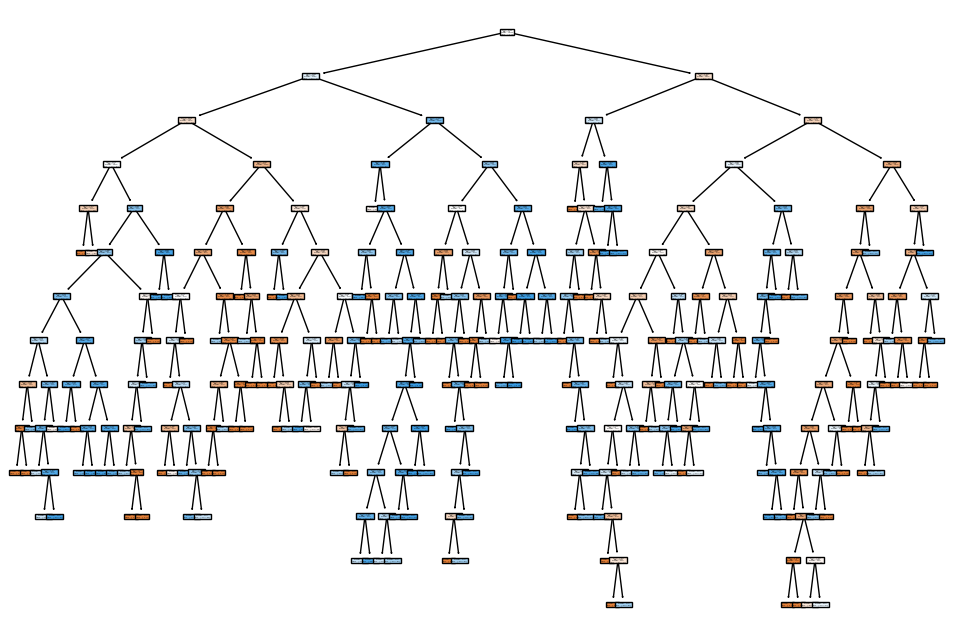

In [8]:
# Visualize the decision tree
plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, impurity=True, proportion=True)
plt.show()

In [9]:
y_preds = clf.predict(X_test)

### Evaluation

In [10]:
acc = accuracy_score(y_test, y_preds)
prec = precision_score(y_test, y_preds)
rec = recall_score(y_test, y_preds)
f1 = f1_score(y_test, y_preds)
auc = roc_auc_score(y_test, y_preds)
cm = confusion_matrix(y_preds, y_test, labels=[1,0])
print(cm)

[[ 33  65]
 [ 28 315]]


In [11]:
print("Accuracy: %.4f" % acc)
print("Precision: %.4f" % prec)
print("Recall: %.4f" % rec)
print("F1: %.4f" % f1)
print("AUC: %.4f" % auc)

Accuracy: 0.7891
Precision: 0.3367
Recall: 0.5410
F1: 0.4151
AUC: 0.6850
